In [1]:
%matplotlib inline

import numpy as np

In [2]:
from p2ch07.dsets import getNoduleInfoList, getCt

noduleInfo_list = getNoduleInfoList(requireDataOnDisk_bool=False)
malignantInfo_list = [x for x in noduleInfo_list if x[0]]
diameter_list = [x[1] for x in malignantInfo_list]

In [3]:
print(len(malignantInfo_list))
print(malignantInfo_list[0])

1351
(True, 23.80291305, '1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084993415992563148335', (-23.71929698, 31.71448919, -156.1722334))


In [4]:
for i in range(0, len(diameter_list), 100):
    print("{:4} {:4.1f} mm".format(i, diameter_list[i]))

   0 23.8 mm
 100  0.0 mm
 200  0.0 mm
 300  0.0 mm
 400  0.0 mm
 500  0.0 mm
 600  0.0 mm
 700  0.0 mm
 800  0.0 mm
 900  0.0 mm
1000  0.0 mm
1100  0.0 mm
1200  0.0 mm
1300  0.0 mm


In [5]:
for nodule_tup in malignantInfo_list[:10]:
    print(nodule_tup)

for nodule_tup in malignantInfo_list[-10:]:
    print(nodule_tup)

(True, 23.80291305, '1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084993415992563148335', (-23.71929698, 31.71448919, -156.1722334))
(True, 0.0, '1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084993415992563148335', (43.1299335424, 74.3265543149, -200.283917909))
(True, 0.0, '1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084993415992563148335', (-29.72, 24.62, -156.01))
(True, 0.0, '1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950022352718462251777', (-161.33, -29.09, -269.29))
(True, 0.0, '1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707182900091062408058', (-102.84092514, 57.8809154545, -124.815520253))
(True, 0.0, '1.3.6.1.4.1.14519.5.2.1.6279.6001.975426625618184773401026809852', (53.4112740527, 84.8638670506, -105.743201967))
(True, 0.0, '1.3.6.1.4.1.14519.5.2.1.6279.6001.970428941353693253759289796610', (-107.92, 72.82, -133.53))
(True, 0.0, '1.3.6.1.4.1.14519.5.2.1.6279.6001.970428941353693253759289796610', (-115.0750247, 64.37987761, -140.4059531))
(True, 0.0, '1.3.6.1.4.1.14519.5.2.1.6279

In [6]:
np.histogram(diameter_list)

(array([1350,    0,    0,    0,    0,    0,    0,    0,    0,    1],
       dtype=int64),
 array([ 0.        ,  2.38029131,  4.76058261,  7.14087392,  9.52116522,
        11.90145653, 14.28174783, 16.66203914, 19.04233044, 21.42262175,
        23.80291305]))

In [7]:
from p2ch07.vis import findMalignantSamples, showNodule

malignantSample_list = findMalignantSamples()

2019-12-22 11:48:59,747 INFO     pid:21672 p2ch07.dsets:164:__init__ <p2ch07.dsets.LunaDataset object at 0x000002D3601788D0>: 56938 training samples


2019-12-22 11:48:59,762 INFO     pid:21672 p2ch07.dsets:164:__init__ <p2ch07.dsets.LunaDataset object at 0x000002D35A1A3A58>: 547 training samples


1.3.6.1.4.1.14519.5.2.1.6279.6001.826812708000318290301835871780 0 True [0, 1]


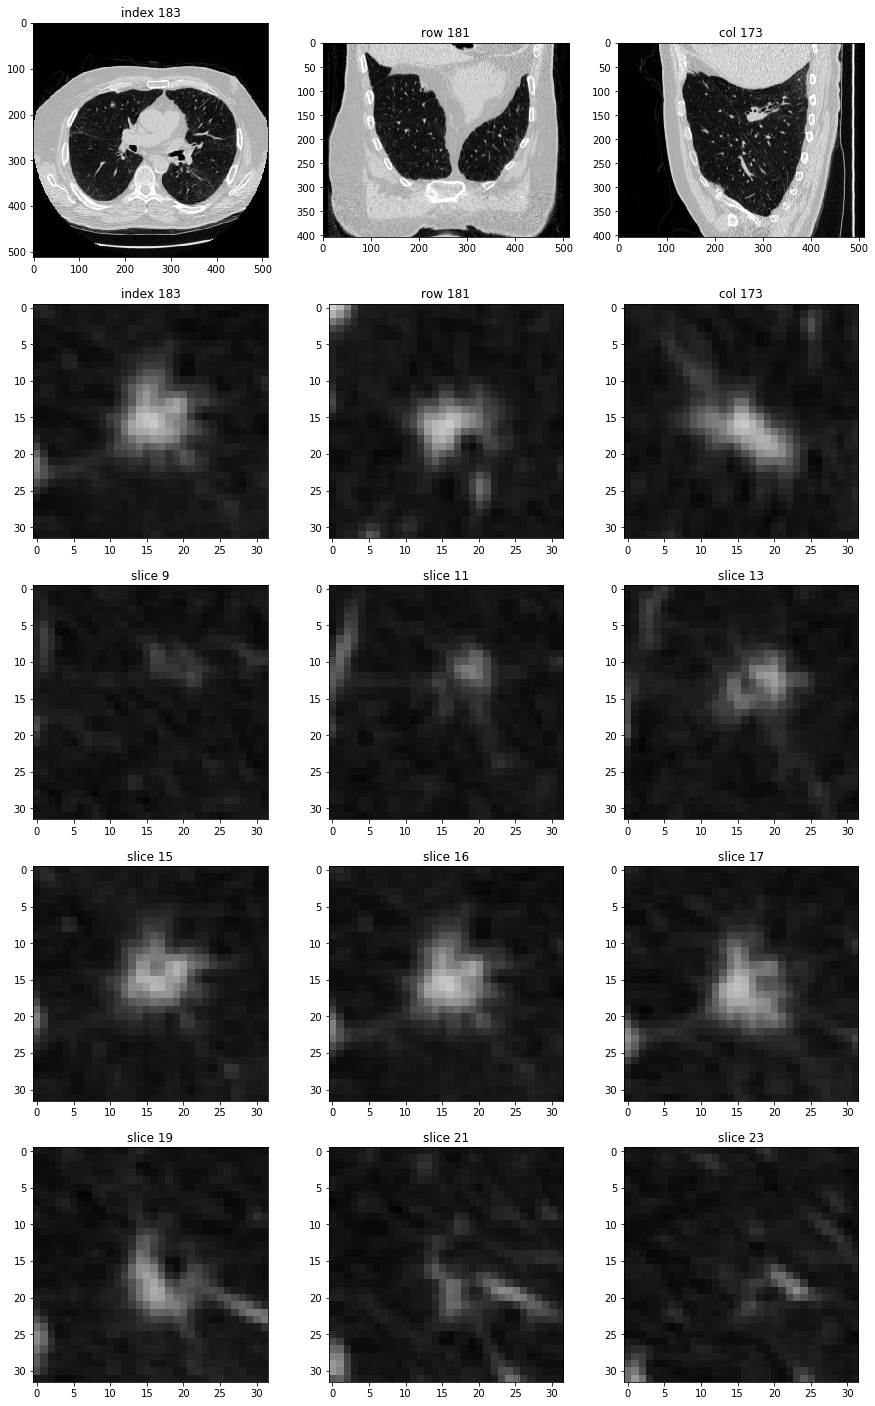

In [8]:
series_uid = malignantSample_list[11][2]
showNodule(series_uid)

2019-12-22 11:49:03,241 INFO     pid:21672 p2ch07.dsets:164:__init__ <p2ch07.dsets.LunaDataset object at 0x000002D36FF6F518>: 605 training samples


1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354 0 True [0]


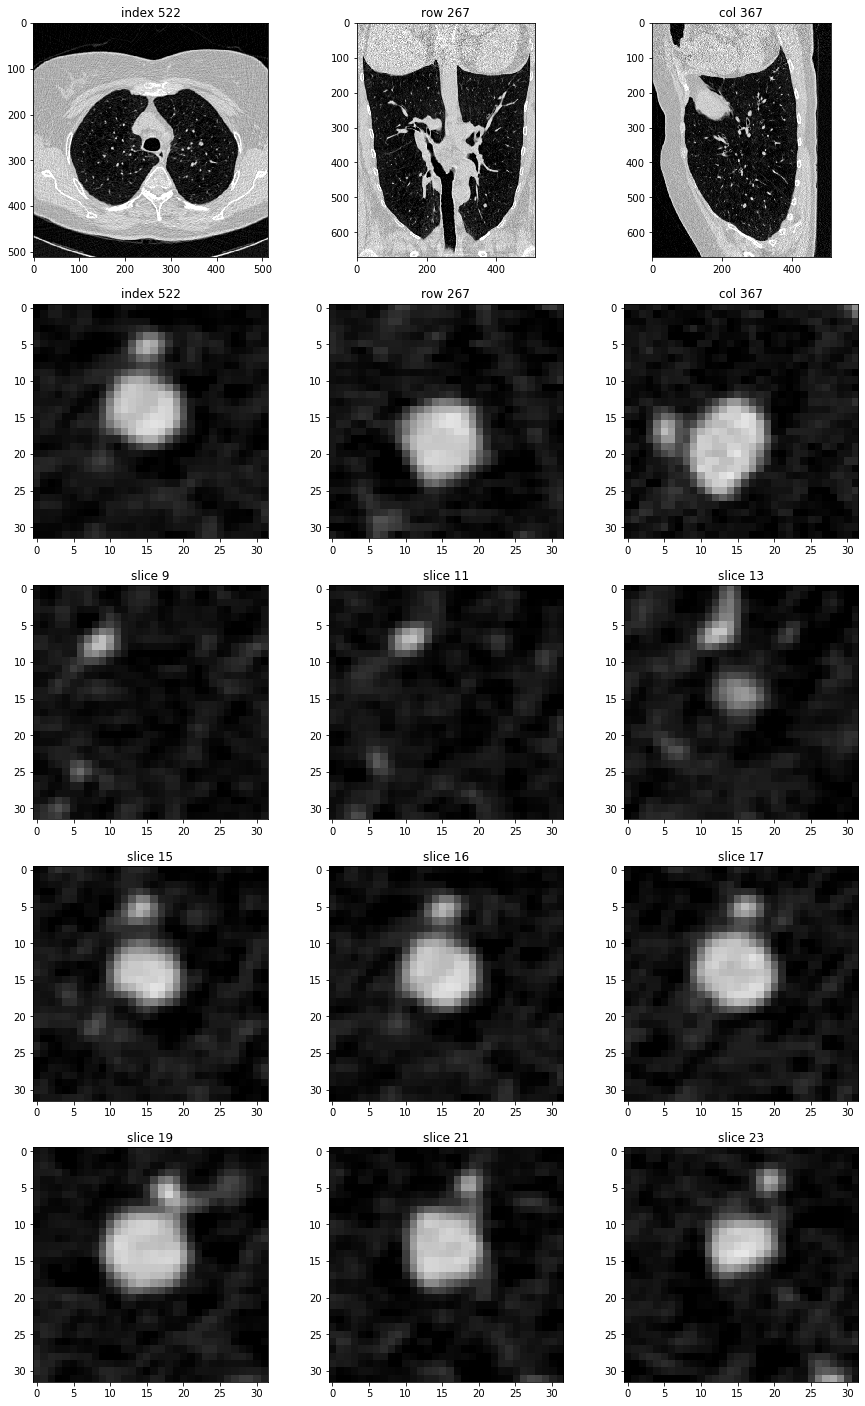

In [9]:
series_uid = "1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354"
showNodule(series_uid)

In [10]:
import ipyvolume as ipv

V = np.zeros((128, 128, 128)) # our 3d array
# outer box
V[30:-30, 30:-30, 30:-30] = 0.75
V[35:-35, 35:-35, 35:-35] = 0.0
# inner box
V[50:-50, 50:-50, 50:-50] = 0.75
V[55:-55, 55:-55, 55:-55] = 0.0

ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, 
                 data_min=0, data_max=0)

C:\Users\a457934\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\ipyvolume\serialize.py:77: RuntimeWarning: divide by zero encountered in true_divide
  grid_normalized = (grid*1.0 - vmin) / (vmax - vmin)
C:\Users\a457934\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\ipyvolume\serialize.py:77: RuntimeWarning: invalid value encountered in true_divide
  grid_normalized = (grid*1.0 - vmin) / (vmax - vmin)
C:\Users\a457934\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\ipyvolume\serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


from p2ch10.dsets import getCt
ct = getCt(series_uid)
air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask = \
    ct.build3dLungMask()

bones = ct.ary * (ct.ary > 1.5)
lungs = ct.ary * air_mask
ipv.figure()
ipv.volshow(bones + lungs, level=[0.17, 0.17, 0.23], data_min=0.1, data_max=0.9)
ipv.show()

In [11]:
from mayavi import mlab

mlab.init_notebook()
mlab.test_plot3d()

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…